In [8]:
import torch
def compute_z(a,b,c) :
    r1 = torch.sub(a,b)
    r2 = torch.mul(r1,2)
    z= torch.add(r2,c)  
    return z

In [9]:
print('스칼라 입력:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))
print('랭크 1 입력:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))
print('랭크 2 입력:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

스칼라 입력: tensor(1)
랭크 1 입력: tensor([1])
랭크 2 입력: tensor([[1]])


### 모델 파라미터를 저장하고 업데이트하기 위한 파이토치 텐서 
파이토치는 훈련 중에 모델의 파라미터를 저장하고 업데이트 할 수 있다
이런 텐서는 사용자가 지정한 초깃값 다음에 require_grad = True로 지정하면 생성할 수 있다

In [10]:
b = torch.tensor([1.0,2.0,3.0], requires_grad=True) # requires_grad=True로 설정하면 미분을 계산할 수 있음 기본값은 False
print(b)

tensor([1., 2., 3.], requires_grad=True)


In [11]:
import torch.nn as nn 
torch.manual_seed(0)
w = torch.empty(3, 5
                )
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.7705, -0.1467, -1.0894,  0.2842, -0.5423],
        [-0.6993,  0.2017,  0.4190, -0.3596, -0.2017],
        [-0.2983,  0.0910, -0.4283,  0.5503, -0.5356]])


In [12]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2,3, requires_grad=True)
        # Xavier Normal 초기화는 가중치 초기화 방법
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1,2, requires_grad=True)
        nn.init.xavier_normal_(self.w2)

#### 자동 미분으로 그레디언트 계산

In [13]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(3.0)
y = torch.tensor(4.0)
z = torch.add(torch.mul(w,x),b)
loss= ((y-z)**2).sum()
loss.backward()

print('dL/dw:', w.grad)
print('dL/db:', b.grad)


dL/dw: tensor(6.)
dL/db: tensor(2.)


In [14]:
print(2*x*(w*x+b-y))
print(2*(w*x+b-y))

tensor(6., grad_fn=<MulBackward0>)
tensor(2., grad_fn=<MulBackward0>)


###### 파이토치는 역전파 구현에 더 효율적인 후진 모드 자동 미분을 사용한다
### torch.nn 모듈을 사용하여 일반적인 아키텍쳐 구현하기

In [15]:
model = nn.Sequential(
    nn.Linear(4,16),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU()
)

In [16]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)


In [17]:
nn.init.xavier_normal_(model[0].weight) # 첫 번째 레이어의 가중치를 초기화
l1_weight = 0.01 # l1 정규화의 가중치를 설정한다
l1_penlaty = l1_weight * model[2].weight.abs().sum()

In [18]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

XOR 분류 문제 풀어보기

In [21]:
import numpy as np


In [22]:
x = np.random.uniform(low=-1, high=1, size=(200, 2))
print(x)

[[ 9.98556822e-01 -2.33458120e-01]
 [ 6.76922118e-01 -2.43420763e-01]
 [ 9.07673981e-01 -1.47672800e-01]
 [-2.90346398e-01 -6.03894432e-01]
 [ 6.73454510e-01 -4.93521239e-01]
 [ 1.32672370e-02  4.53523628e-01]
 [ 6.84875293e-01 -6.15141891e-01]
 [-9.98526676e-01 -4.25581915e-02]
 [ 4.70295978e-01  9.51519775e-01]
 [ 2.38891583e-01  7.13951121e-01]
 [-3.47090227e-01 -3.84450298e-01]
 [ 5.43972431e-01  7.39806486e-01]
 [ 6.43625400e-01 -3.29711931e-01]
 [-7.31123094e-01  4.03883900e-01]
 [ 2.66666397e-01  1.69088598e-01]
 [ 1.38744894e-01 -7.47559447e-01]
 [-9.79966107e-01  9.00331185e-01]
 [ 9.38154820e-01  6.31197391e-01]
 [ 6.09648962e-01  1.14809695e-01]
 [-8.20946501e-01  4.38709526e-01]
 [ 1.06083580e-01 -4.77743558e-01]
 [ 7.09388803e-01 -5.82950004e-02]
 [ 8.70298329e-01 -1.00951081e-01]
 [-6.97308625e-01 -1.41873625e-01]
 [-7.92141626e-01  6.02622736e-01]
 [-1.01715333e-01 -3.25832801e-01]
 [-2.14615647e-01 -2.22312369e-01]
 [ 6.47506905e-01  4.83119655e-02]
 [ 9.86738045e-01 -4

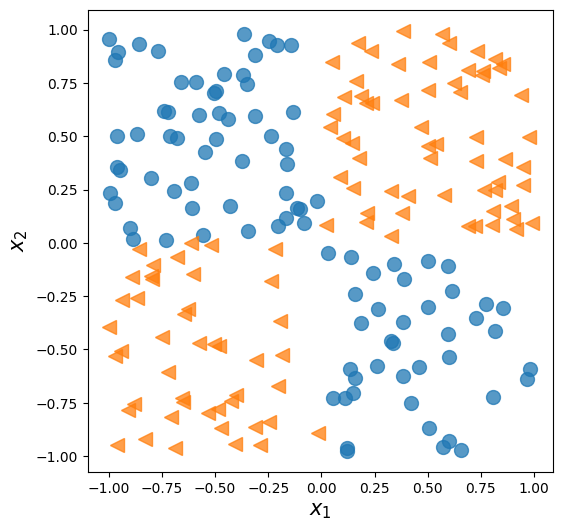

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0 # x1*x2가 음수인 경우에는 y를 0으로 설정

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

#plt.savefig('figures/13_02.png', dpi=300)
plt.show()

In [15]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)


In [16]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(0)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [18]:

num_epochs = 300
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size # 각 에포크에서의 평균 손실
        accuracy_hist_train[epoch] /= n_train/batch_size # 각 에포크에서의 평균 정확도 

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

KeyboardInterrupt: 

Text(0.5, 0, 'Epochs')

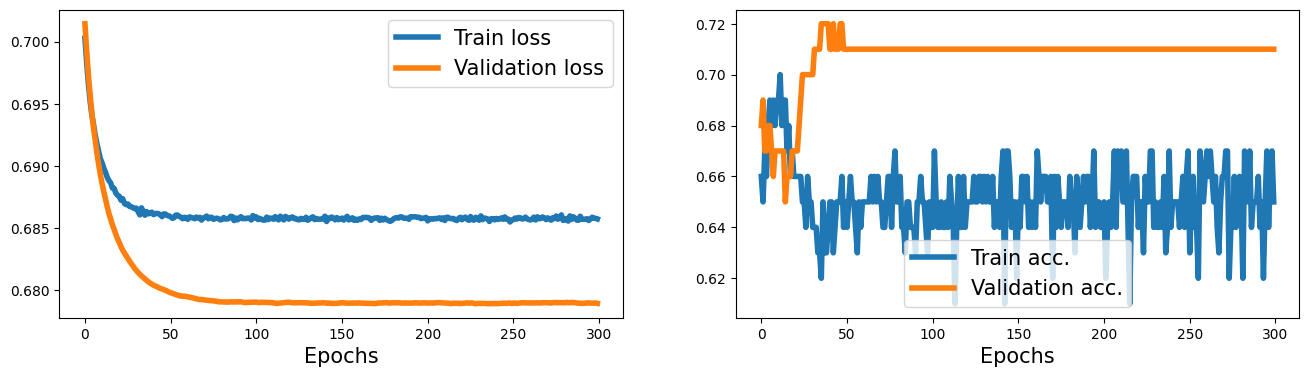

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)


In [ ]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

print(model)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

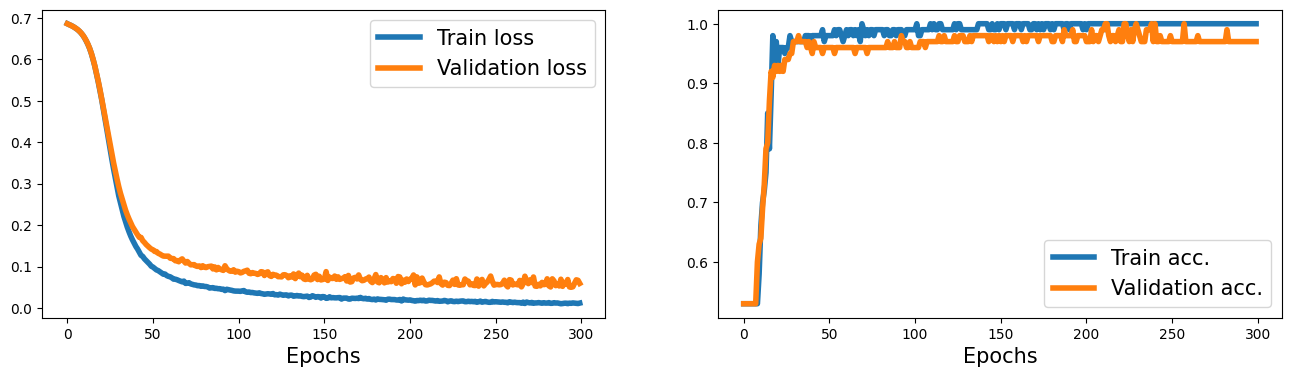

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

In [19]:
class MyModel(nn.Module):
    def __init__(self) :
        super().__init__()
        l1 = nn.Linear(2,4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4,4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4,1)
        a3 = nn.LeakyReLU(0.2)
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list=  nn.ModuleList(l)
    def forward(self,x ) :
        for f in self.module_list:
            x = f(x)
        return x

In [20]:
print(MyModel())

MyModel(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
  )
)


In [21]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)